In [158]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

## First look on data

In [130]:
#data_path = os.path.join(os.getcwd(), 'scraped_data', 'SHIB-WETH', 'SHIB-WETH_2023-03-24_07-21-05.csv')
data_path = r'd:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\scraped_data\HEX-WETH\HEX-WETH_2023-03-31_07-34-14.csv'
df = pd.read_csv(data_path)
#df = df_concatenated

In [131]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4756 entries, 2023-04-03 06:49:59 to 2023-03-16 04:42:23
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   buy_order      4756 non-null   bool   
 1   price_USD      4756 non-null   float64
 2   price_native   4756 non-null   float64
 3   amount_token   4756 non-null   float64
 4   total_native   4756 non-null   float64
 5   maker          4756 non-null   object 
 6   etherscan_url  4756 non-null   object 
dtypes: bool(1), float64(4), object(2)
memory usage: 264.7+ KB


,buy_order,price_USD,price_native,amount_token,total_native,maker,etherscan_url
datetime,,,,,,,
2023-04-03 06:49:59,True,0.000011,6.013000e-10,1046745.0,0.006200,0xaf...fcc1,https://etherscan.io/tx/0x1262c81abc9852dcae38...
2023-04-03 05:55:47,True,0.000011,6.012000e-10,13056928.0,0.078500,0x24...8a09,https://etherscan.io/tx/0xb278ff8bfcad4450aef6...
2023-04-03 05:54:11,True,0.000011,6.011000e-10,164884.0,0.000099,0xe3...3221,https://etherscan.io/tx/0xc5a22f606ecbdbc7eccd...
2023-04-03 05:24:59,True,0.000011,6.010000e-10,9278652.0,0.055700,0x26...c8ea,https://etherscan.io/tx/0x5ba48b8741bf0030c1a1...
2023-04-03 05:17:35,True,0.000011,6.009000e-10,164950.0,0.000099,0x94...b790,https://etherscan.io/tx/0x507183c1fc34b1214a18...
...,...,...,...,...,...,...,...
2023-03-16 04:48:35,False,0.000010,6.243000e-10,7489716.0,0.046700,0xf9...f76c,https://etherscan.io/tx/0x1938b99d7206420e0453...
2023-03-16 04:44:35,False,0.000010,6.246000e-10,17009610.0,0.106200,0xbd...8137,https://etherscan.io/tx/0xee46de1f49a752d616e3...
2023-03-16 04:42:47,False,0.000010,6.260000e-10,133253185.0,0.834200,0x76...7d5e,https://etherscan.io/tx/0x61032abd4996081aec1e...


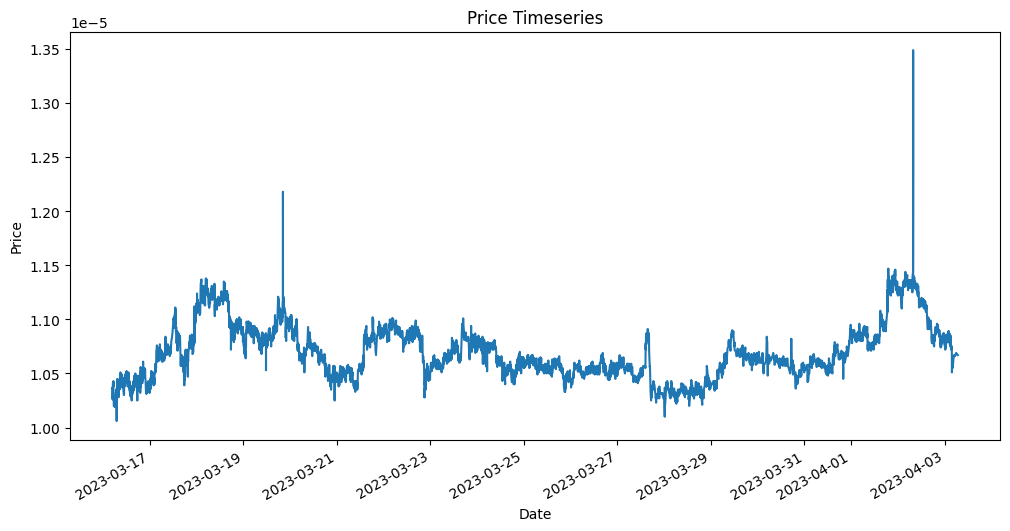

In [133]:
# Plot the price timeseries
df['price_native'].plot(figsize=(12, 6))
plt.title('Price Timeseries')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [138]:
df['returns'] = df['price_native'].pct_change()
df['log_returns'] = np.log(df['price_native']) - np.log(df['price_native'].shift(1))

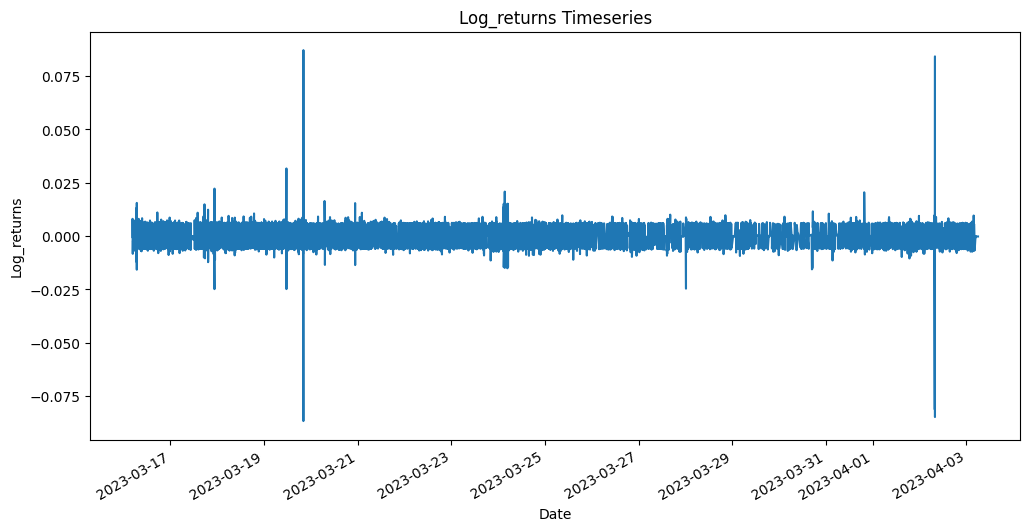

In [139]:
# Plot the price timeseries
df['log_returns'].plot(figsize=(12, 6))
plt.title('Log_returns Timeseries')
plt.xlabel('Date')
plt.ylabel('Log_returns')
plt.show()

In [141]:
df.log_returns.describe()

count    4755.000000
mean        0.000010
std         0.005385
min        -0.086670
25%        -0.002897
50%         0.000000
75%         0.002408
max         0.087162
Name: log_returns, dtype: float64

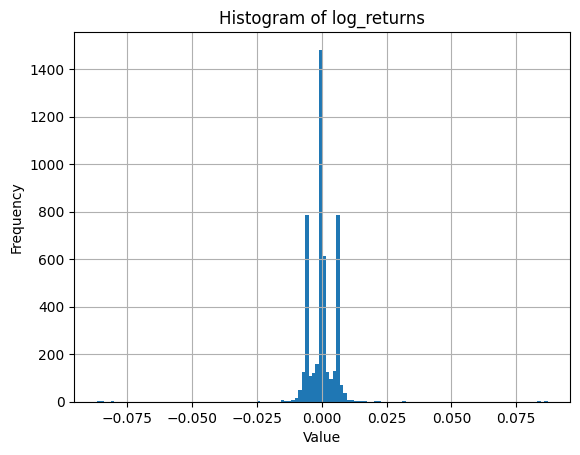

In [143]:
df['log_returns'].hist(bins = 130)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of log_returns')

# display the plot
plt.show() #so far it seems quite ok, hopefully more data will result into something better

In [34]:
print(df['log_returns'].min())
q = df['log_returns'].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
print(q)
print(df['log_returns'].max())


-0.05447039726205549
0.01   -0.010750
0.05   -0.006795
0.25   -0.002579
0.50   -0.000549
0.75    0.001746
0.95    0.007378
0.99    0.012138
Name: log_returns, dtype: float64
0.05372919895758521


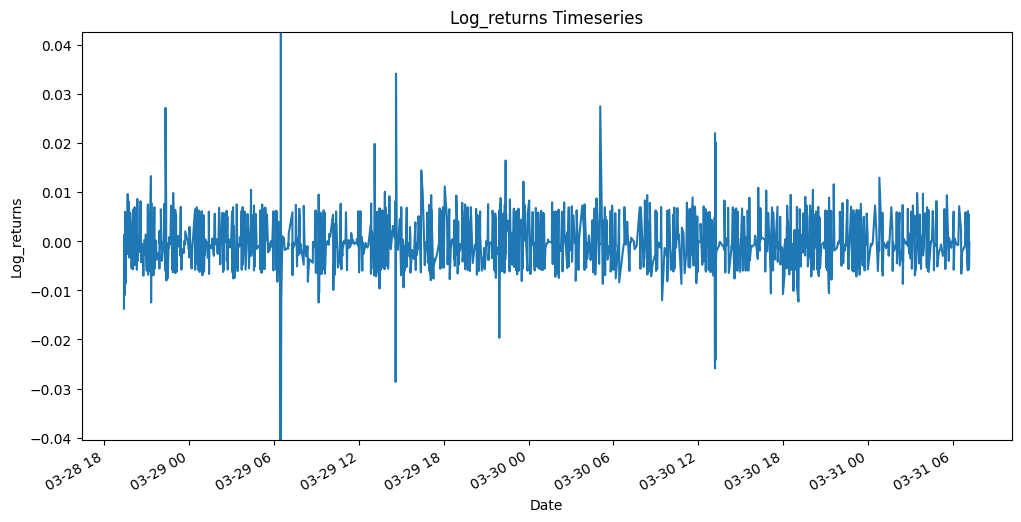

In [35]:
## Doing to plot returns with outliers cropped

# set the lower and upper percentile range for the y-axis
lower_percentile = 0.001
upper_percentile = 0.999

# calculate the lower and upper percentile values of column B
lower_value = df['log_returns'].quantile(lower_percentile)
upper_value = df['log_returns'].quantile(upper_percentile)

# Plot the price timeseries
df['log_returns'].plot(figsize=(12, 6))
plt.ylim(lower_value, upper_value)
plt.title('Log_returns Timeseries')
plt.xlabel('Date')
plt.ylabel('Log_returns')
plt.show()


## Concattanating separate dataframes - deprecated, already done in separate script

In [2]:
#list of pairs, copiyng for names of files
pair_list = [
            ("SHIB-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x811beed0119b4afce20d2583eb608c6f7af1954f", 50),
            ("HEX-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x55d5c232d921b9eaa6b37b5845e439acd04b4dba", 100),
            ("AGIX-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0xe45b4a84e0ad24b8617a489d743c52b84b7acebe", 40),
            ("OPTIMUS-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x8de7a9540e0edb617d78ca5a7c6cc18295fd8bb9", 70),
            ("SHIK-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x0b9f5cef1ee41f8cccaa8c3b4c922ab406c980cc", 60),
            ("INJ-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x1bdcebca3b93af70b58c41272aea2231754b23ca", 60),
            ("VOLT-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x487bfe79c55ac32785c66774b597699e092d0cd9", 200),
            ("MBOX-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x8fa59693458289914db0097f5f366d771b7a7c3f", 90),
            ("FLOKI-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x231d9e7181e8479a8b40930961e93e7ed798542c", 180),
            ("BabyDoge-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0xc736ca3d9b1e90af4230bd8f9626528b3d4e0ee0", 180)
            ]

In [125]:
#function that loads all vsc file from a folder and connects them to 1 file

def load_csv_files(folder_path):
    df_dict = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            name = os.path.splitext(file_name)[0]
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path).drop_duplicates().reset_index()
            df_dict[name] = df
    return df_dict

In [126]:
folder_path = "D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/scraped_data/SHIB-WETH"
df_dict = load_csv_files(folder_path)

In [127]:
def concatenate_dataframes(df_dict):
    # Concatenate DataFrames
    df_list = list(df_dict.values())
    df_concatenated = pd.concat(df_list, axis=0)

    # Ensure datetime column is sorted
    df_concatenated.sort_values(by=["datetime", "index"], ascending=[False, True], inplace=True)
    df_concatenated.drop(columns=['index'], inplace=True)
    df_concatenated.drop_duplicates(inplace=True)

    return df_concatenated

In [128]:
df_concatenated = concatenate_dataframes(df_dict)

In [129]:
df_concatenated

,datetime,buy_order,price_USD,price_native,amount_token,total_native,maker,etherscan_url
0,2023-04-03 06:49:59,True,0.000011,6.013000e-10,1046745.0,0.006200,0xaf...fcc1,https://etherscan.io/tx/0x1262c81abc9852dcae38...
1,2023-04-03 05:55:47,True,0.000011,6.012000e-10,13056928.0,0.078500,0x24...8a09,https://etherscan.io/tx/0xb278ff8bfcad4450aef6...
2,2023-04-03 05:54:11,True,0.000011,6.011000e-10,164884.0,0.000099,0xe3...3221,https://etherscan.io/tx/0xc5a22f606ecbdbc7eccd...
3,2023-04-03 05:24:59,True,0.000011,6.010000e-10,9278652.0,0.055700,0x26...c8ea,https://etherscan.io/tx/0x5ba48b8741bf0030c1a1...
4,2023-04-03 05:17:35,True,0.000011,6.009000e-10,164950.0,0.000099,0x94...b790,https://etherscan.io/tx/0x507183c1fc34b1214a18...
...,...,...,...,...,...,...,...,...
1500,2023-03-16 04:48:35,False,0.000010,6.243000e-10,7489716.0,0.046700,0xf9...f76c,https://etherscan.io/tx/0x1938b99d7206420e0453...
1501,2023-03-16 04:44:35,False,0.000010,6.246000e-10,17009610.0,0.106200,0xbd...8137,https://etherscan.io/tx/0xee46de1f49a752d616e3...
1502,2023-03-16 04:42:47,False,0.000010,6.260000e-10,133253185.0,0.834200,0x76...7d5e,https://etherscan.io/tx/0x61032abd4996081aec1e...
1503,2023-03-16 04:42:35,True,0.000010,6.311000e-10,720337.0,0.004500,0xbc...e87f,https://etherscan.io/tx/0x710c4bdc3ec6772dea12...


## First look on all the data at once

### Doing basic plots for all 10 datasets

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pair_list = [
            ("SHIB-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x811beed0119b4afce20d2583eb608c6f7af1954f", 50),
            ("HEX-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x55d5c232d921b9eaa6b37b5845e439acd04b4dba", 100),
            ("AGIX-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0xe45b4a84e0ad24b8617a489d743c52b84b7acebe", 40),
            ("OPTIMUS-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x8de7a9540e0edb617d78ca5a7c6cc18295fd8bb9", 70),
            ("SHIK-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x0b9f5cef1ee41f8cccaa8c3b4c922ab406c980cc", 60),
            ("INJ-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x1bdcebca3b93af70b58c41272aea2231754b23ca", 60),
            ("VOLT-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x487bfe79c55ac32785c66774b597699e092d0cd9", 200),
            ("MBOX-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x8fa59693458289914db0097f5f366d771b7a7c3f", 90),
            ("FLOKI-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x231d9e7181e8479a8b40930961e93e7ed798542c", 180),
            ("BabyDoge-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0xc736ca3d9b1e90af4230bd8f9626528b3d4e0ee0", 180)
            ]

In [3]:
import pandas as pd

def load_csv_to_df(file_path, verbose=False, name=""):
    # Load CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # If verbose mode is enabled, print the dataset name, number of rows, and some datetime information
    if verbose:
        #print(name)
        print("Number of rows:", len(df))
        print("Last datetime:", df.datetime.iloc[-2], )  # Assuming there is a "datetime" column in the DataFrame
        print("First datetime:", df.datetime.iloc[0])
        print("Time difference (in days):", datetime.strptime(df.datetime.iloc[0], '%Y-%m-%d %H:%M:%S') - datetime.strptime(df.datetime.iloc[-5], '%Y-%m-%d %H:%M:%S'))
        print()
    
    # Return the DataFrame
    return df

def set_index(df, info=False):
    # Convert 'datetime' column to datetime type and set it as the index
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)
    
    if info:
        # Print some information about the resulting DataFrame
        df.info()

In [4]:
#plotting function
#current version
def plot_price(df, native=True, name="", ax=None, plot_both=False):
    # Choose the column to plot based on native argument
    if native:
        price_column = 'price_native'
        column_name = 'Price (native token)'
    else:
        price_column = 'price_USD'
        column_name = 'Price (USD)'
    
    # Plot the chosen column as a timeseries
    if ax is None and not plot_both:
        fig, ax = plt.subplots(figsize=(12, 6))

    if not plot_both:
        df[price_column].plot(ax=ax)
    
        # Set the title, axis labels
        ax.set_title(f'{name} {column_name} Timeseries')
        ax.set_xlabel('Date')
        ax.set_ylabel(column_name)
    
    # Optionally plot both timeseries side by side
    if plot_both:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
        plot_price(df, native=True, name=name, ax=ax1, plot_both=False)
        plot_price(df, native=False, name=name, ax=ax2, plot_both=False)
        plt.show()

In [5]:
#get returns
def add_returns(df, price_col='price_native', ret_col='return', log_ret_col='log_return'):
    """
    Adds returns and log returns columns to a Pandas DataFrame based on a price series.
    
    Parameters:
    df (Pandas DataFrame): The DataFrame to which the columns will be added.
    price_col (str): The name of the column containing the price series (default: 'price').
    ret_col (str): The name of the column to store the simple returns (default: 'return').
    log_ret_col (str): The name of the column to store the log returns (default: 'log_return').
    
    Returns:
    None
    """
    
    # Calculate simple returns
    df[ret_col] = df[price_col].pct_change()
    
    # Calculate log returns
    df[log_ret_col] = np.log(df[price_col] / df[price_col].shift(1))
    
    # Drop the first row (which will have NaN values due to the calculation of returns)
    df.dropna(inplace=True)

In [6]:
def plot_returns(df, native=True, log=True, name = "", lower_percentile=0, higher_percentile=100, histogram = False, bins = 20, 
                 buy_only = False, sell_only = False, set_hist_limit = False, lower_limit_abs = -1, higher_limit_abs = 1):
    """
    Plots the returns or log returns columns of a Pandas DataFrame.
    
    Parameters:
    df (Pandas DataFrame): The DataFrame containing the returns columns to be plotted.
    native (bool): Whether to plot the native currency returns (default: True).
    log (bool): Whether to plot the log returns (default: True).
    
    Returns:
    None
    """
    
    # Choose the columns to plot based on native and log arguments
    if native and log:
        ret_col = 'log_return_native'
        title = 'Log Returns (native token)'
    elif native and not log:
        ret_col = 'return_native'
        title = 'Simple Returns (native token)'
    elif not native and log:
        ret_col = 'log_return_USD'
        title = 'Log Returns (USD)'
    else:
        ret_col = 'return_USD'
        title = 'Simple Returns (USD)'

    # Subset DataFrame based on "buy_order" column if specified
    if buy_only:
        df = df[df["buy_order"] == True]
        title = name + "BUYS " + title
    elif sell_only:
        df = df[df["buy_order"] == False]
        title = name + "SELLS " + title
    else:
        title = name + " " + title

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_data = df[ret_col]
    # lower_limit = np.percentile(plot_data, lower_percentile)*1.1
    # higher_limit = np.percentile(plot_data, higher_percentile)*1.1
    if not histogram:
        lower_limit = np.percentile(plot_data, lower_percentile)*1.1
        higher_limit = np.percentile(plot_data, higher_percentile)*1.1
        plot_data.plot(ax=ax)
        ax.set_ylim(lower_limit, higher_limit)
        # Set the title and axis labels
        ax.set_title(title)
        ax.set_xlabel('Date')
        ax.set_ylabel('Return')
    else:
        plot_data.hist(ax=ax, bins=bins, edgecolor='black')
        if set_hist_limit:
            ax.set_xlim(lower_limit_abs, higher_limit_abs)
        # Set the title and axis labels
        ax.set_title(title)
        ax.set_xlabel('Return')
        ax.set_ylabel('Count')
    
    # Show the plot
    plt.show()


In [7]:
def print_stats(df, native=True, log=True, name = "", quantiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]):
    """
    Prints the minimum, maximum, and quantiles of a column in a Pandas DataFrame.
    
    Parameters:
    df (Pandas DataFrame): The DataFrame containing the column to be analyzed.
    col (str): The name of the column to be analyzed.
    
    Returns:
    None
    """
    if native and log:
        ret_col = 'log_return_native'
        title = 'Log Returns (native currency)'
    elif native and not log:
        ret_col = 'return_native'
        title = 'Simple Returns (native currency)'
    elif not native and log:
        ret_col = 'log_return_USD'
        title = 'Log Returns (USD)'
    else:
        ret_col = 'return_USD'
        title = 'Simple Returns (USD)'
    print(title)
    print(df[ret_col].min())
    q = df[ret_col].quantile(quantiles)
    print(q)
    print(df[ret_col].max(), "\n")

In [12]:
#Ploting ACF and PACF
def plot_acf_pacf(data, lags=35, figsize=(9, 8)):
    """
    Plots Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for a given time series data.
    
    Args:
    data (array-like): Time series data.
    lags (int): Number of lags to include in ACF and PACF plots. Default is 35.
    figsize (tuple): Figure size of the plots. Default is (9, 8).
    
    Returns:
    None
    """
    f, ax = plt.subplots(nrows=2, ncols=1, figsize=figsize)
    plot_acf(data, lags=lags, ax=ax[0])
    plot_pacf(data, lags=lags, ax=ax[1], method='ols')
    plt.tight_layout()
    plt.show()

In [67]:
#Plot the spacing between observations
def plot_observation_spacing(df, name = ""):
    """
    Plots a histogram of spacing between observations in seconds.
    
    Args:
    - df (pd.DataFrame): Input DataFrame with DateTimeIndex.
    
    Returns:
    - None
    """
    # Calculate spacing between observations
    spacing = np.diff(df.index).astype('timedelta64[s]').astype(int) *-1
    
    # Plot histogram
    plt.hist(spacing, bins=100, edgecolor='black')
    #plt.xlim(0, 20)
    plt.xlabel('Spacing between observations (seconds)')
    plt.ylabel('Frequency')
    plt.title(name + ' Histogram of Spacing between Observations')
    plt.show()

SHIB-WETH


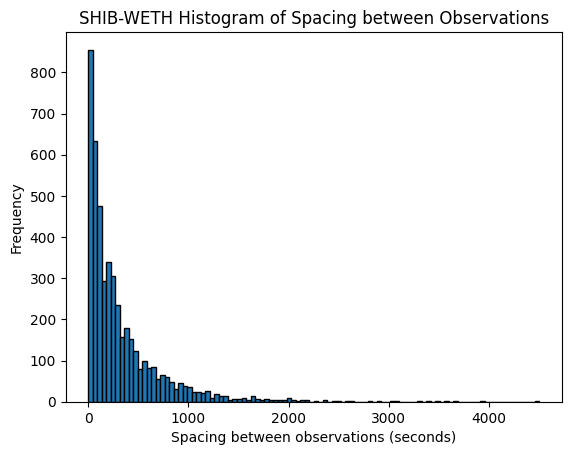

HEX-WETH


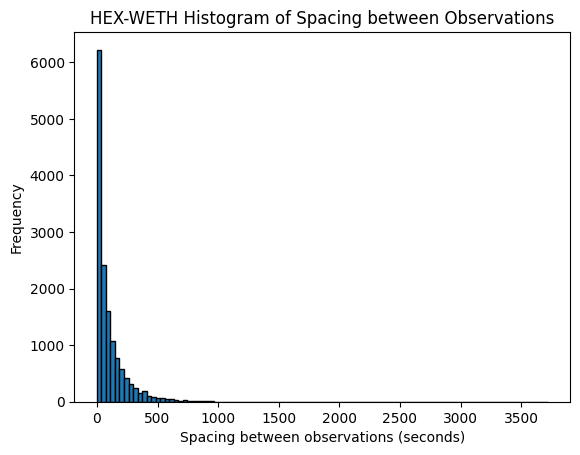

AGIX-WETH


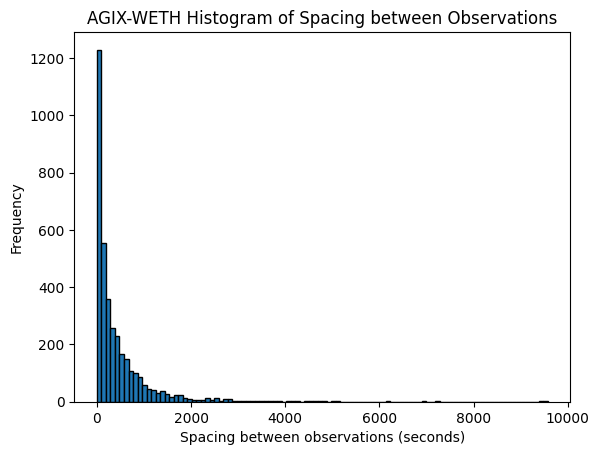

OPTIMUS-WETH


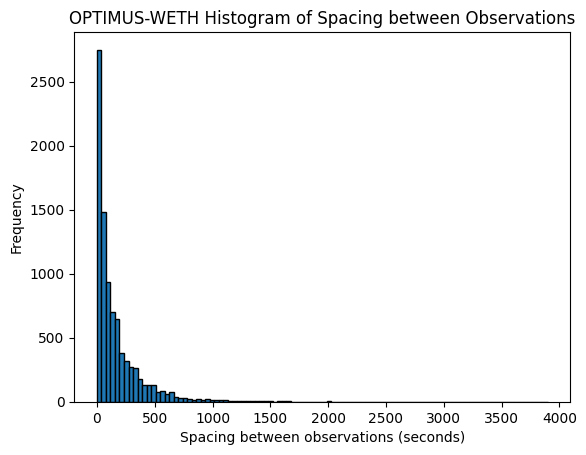

SHIK-WETH


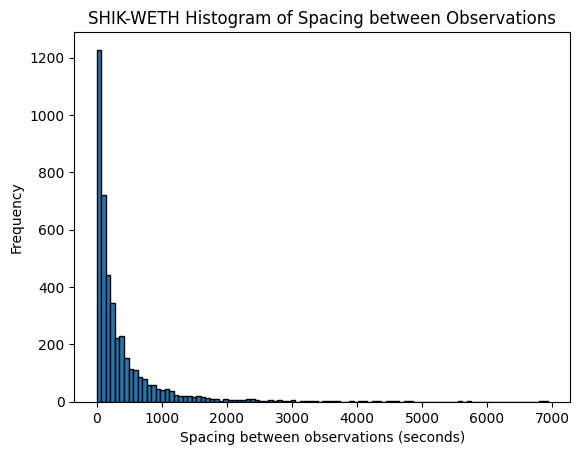

INJ-WBNB


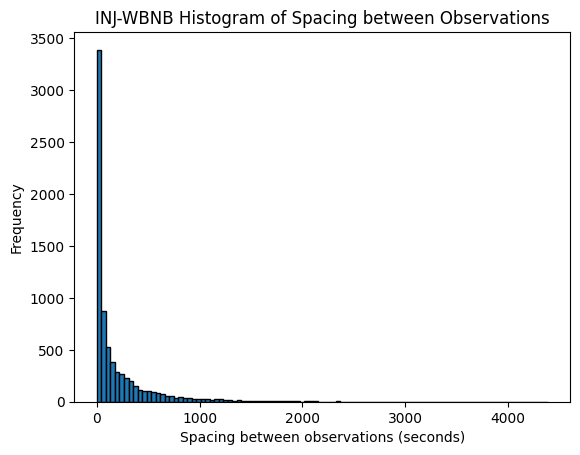

VOLT-WBNB


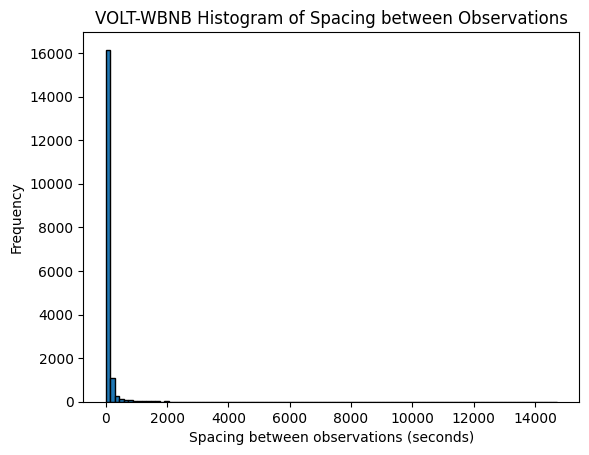

MBOX-WBNB


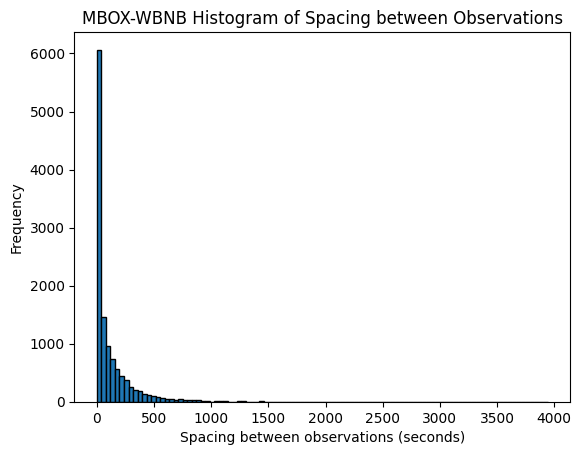

FLOKI-WBNB


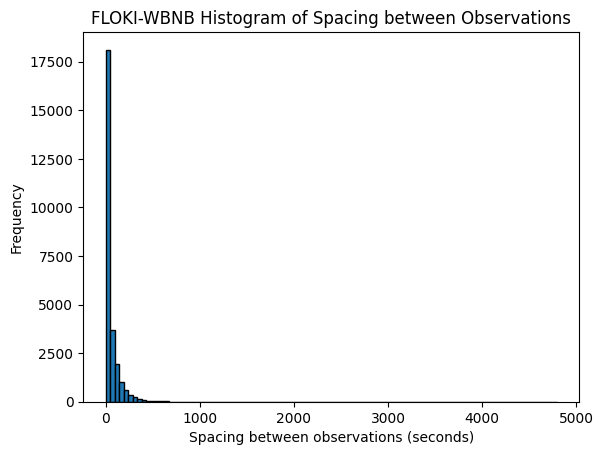

BabyDoge-WBNB


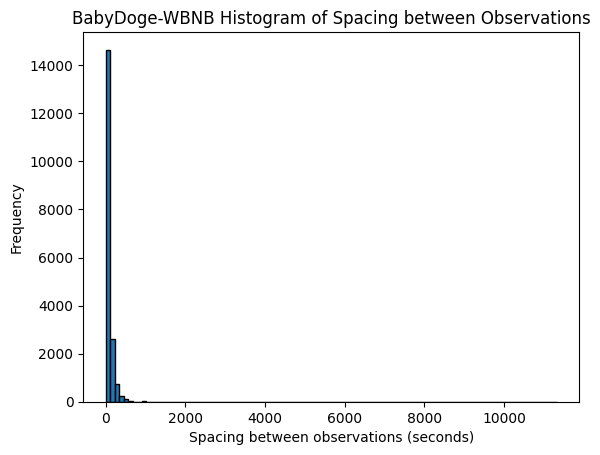

In [68]:
#loop through all 10 datasets
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    print(name)
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)

    #printing info on column of a df
    #print(df.info())

    ### Basic block of plots ###
    #Price plots
    #plot_price(df, native=True, name=name, ax=None, plot_both=True)
  
    #adding retruns and plotting them
    add_returns(df, price_col='price_native', ret_col='return_native', log_ret_col='log_return_native')
    add_returns(df, price_col='price_USD', ret_col='return_USD', log_ret_col='log_return_USD')
    
    #plot_returns(df, native=True, log=False, name=name, lower_percentile=0, higher_percentile=100, histogram=True, bins=100)
    # plot_returns(df, native=True, log=False, name=name, lower_percentile=0, higher_percentile=100, histogram=False, bins=100)
    # plot_returns(df, native=True, log=False, name=name, lower_percentile=0, higher_percentile=100, histogram=True, bins=100, 
    #              set_hist_limit=False, lower_limit_abs=-0.2, higher_limit_abs=0.2)
    # print_stats(df, native=True, log=False, name=name)
    
    ### Histograms with separate Buy/Sell groups ###
    #adding retruns and plotting them in histogram with buy/sell separated
    # add_returns(df, price_col='price_native', ret_col='return_native', log_ret_col='log_return_native')
    # add_returns(df, price_col='price_USD', ret_col='return_USD', log_ret_col='log_return_USD')
    # plot_returns(df, native=True, log=False, name=name, lower_percentile=0, higher_percentile=100, histogram=True, bins=100, buy_only = False, sell_only = False)
    # plot_returns(df, native=True, log=False, name=name, lower_percentile=0, higher_percentile=100, histogram=True, bins=100, buy_only = True, sell_only = False)
    # plot_returns(df, native=True, log=False, name=name, lower_percentile=0, higher_percentile=100, histogram=True, bins=100, buy_only = False, sell_only = True)


    ### Test Statistics ###
    # #print Jarque-Bera test -- H0: Skewness and Kurtosis match Normal distribution - strongly rejected
    # print(stats.jarque_bera(df.return_native))

    # #print ADF (Augment Dickey-Fuller) -- H0: there is a unit root present (i.e. series is not stationary) - strongly rejected
    # result = adfuller(df.return_native)
    # print('ADF Statistic: %f' % result[0], 'p-value: %f' % result[1])
    
    ### ACF and PACF ###
    #plot_acf_pacf(df.log_return_USD, lags=35, figsize=(9, 8))

    ### Get the histogram of time intervals ###
    plot_observation_spacing(df, name=name)

    

In [43]:

def rescale_price_to_time_interval(df, time_interval, price_columns=('price_native', 'price_USD'), rescale_method='close'):
    """
    Rescales price column in a Pandas DataFrame to a specified time interval.

    Args:
        df (pd.DataFrame): Original DataFrame containing price data.
        time_interval (str): Time interval for rescaling. Allowed values are '5Min', '15Min', or '1H' for 5 minutes,
                            15 minutes, or 1 hour, respectively.
        price_column (str, optional): Column name of the price data. Defaults to 'price_native'.
        rescale_method (str, optional): Method for rescaling. Allowed values are 'high', 'low', or 'close' to rescale
                                       to the highest, lowest, or closing price, respectively. Defaults to 'close'.

    Returns:
        pd.DataFrame: Rescaled DataFrame with time intervals and rescaled price column.
    """

    # Resample to desired time interval and select rescale method
    if rescale_method == 'high':
        rescaled_price_native = df[price_columns[0]].resample(time_interval).max()
        rescaled_price_USD = df[price_columns[1]].resample(time_interval).max()
    elif rescale_method == 'low':
        rescaled_price_native = df[price_columns[0]].resample(time_interval).min()
        rescaled_price_USD = df[price_columns[1]].resample(time_interval).min()
    elif rescale_method == 'close':
        rescaled_price_native = df[price_columns[0]].resample(time_interval).last()
        rescaled_price_USD = df[price_columns[1]].resample(time_interval).last()
    else:
        raise ValueError("Invalid rescale_method. Allowed values are 'high', 'low', or 'close'.")

    # Forward fill missing values with last valid value
    rescaled_price_native = rescaled_price_native.ffill()
    rescaled_price_USD = rescaled_price_USD.ffill()

    # Create rescaled DataFrame
    rescaled_df = pd.DataFrame(rescaled_price_native)
    rescaled_df["price_USD"] = rescaled_price_USD

    return rescaled_df

SHIB-WETH


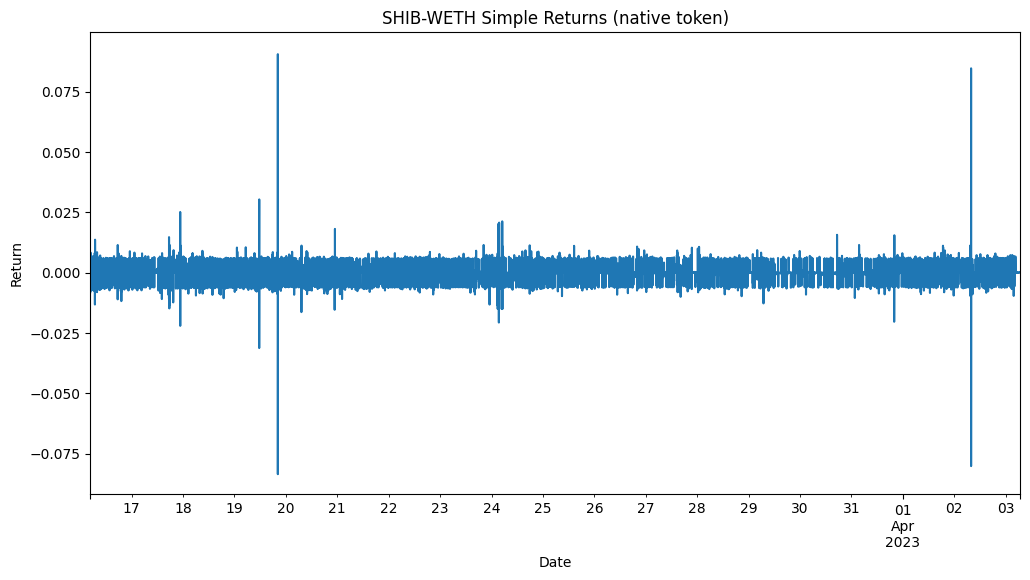

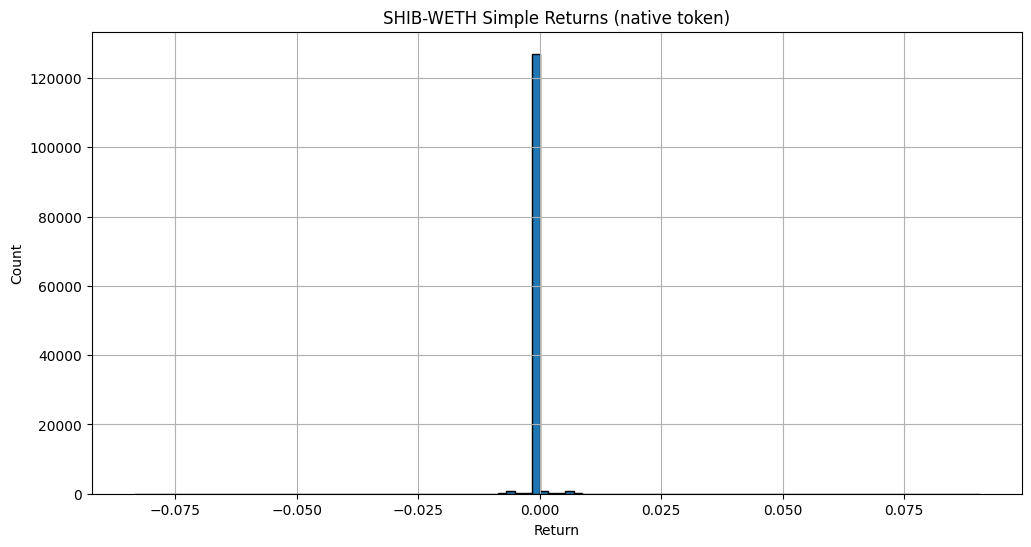

Simple Returns (native currency)
-0.08347119867649277
0.01   -0.001018
0.05    0.000000
0.25    0.000000
0.50    0.000000
0.75    0.000000
0.95    0.000000
0.99    0.001177
Name: return_native, dtype: float64
0.0905363293422996 

HEX-WETH


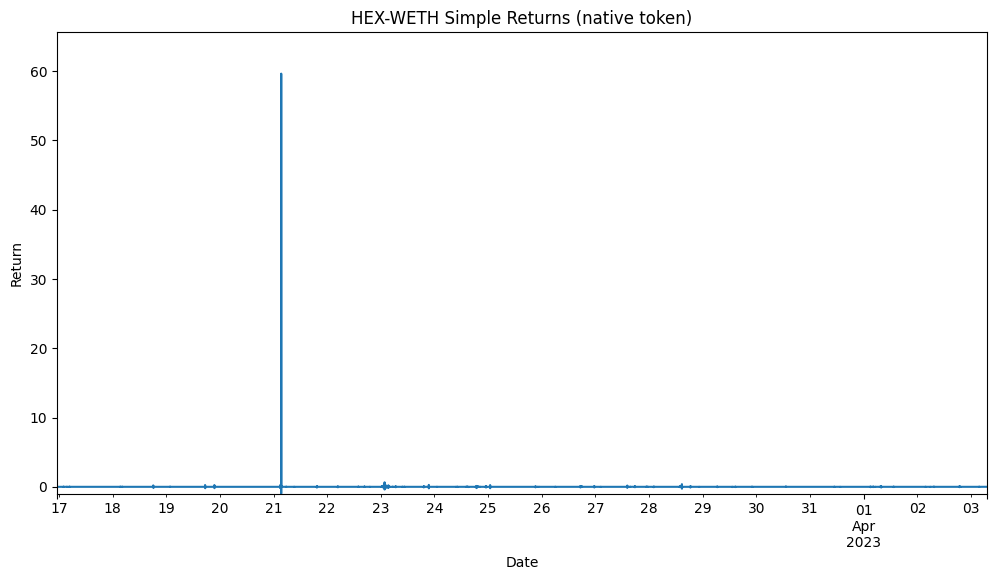

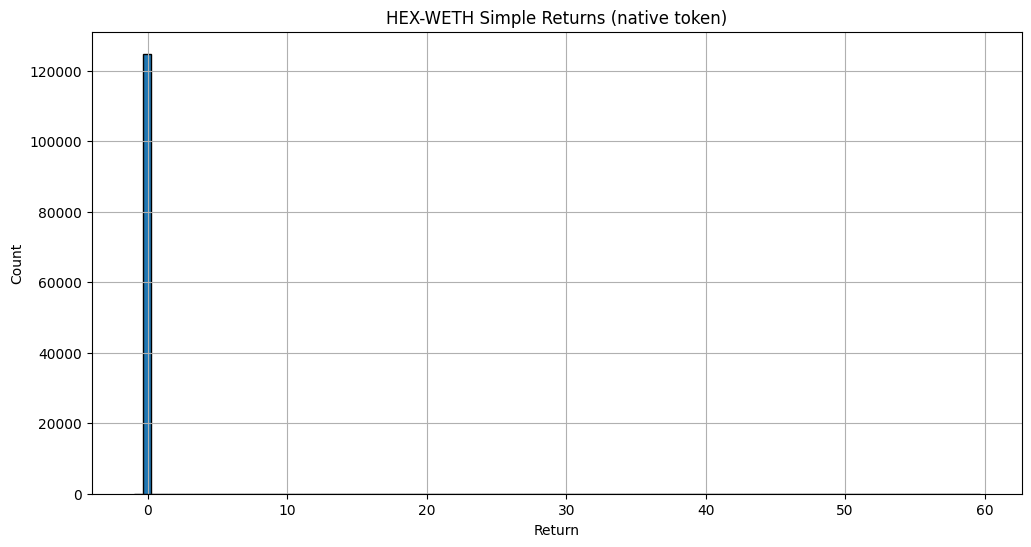

Simple Returns (native currency)
-0.9836238445576306
0.01   -0.006588
0.05    0.000000
0.25    0.000000
0.50    0.000000
0.75    0.000000
0.95    0.000469
0.99    0.005950
Name: return_native, dtype: float64
59.64969473562954 

AGIX-WETH


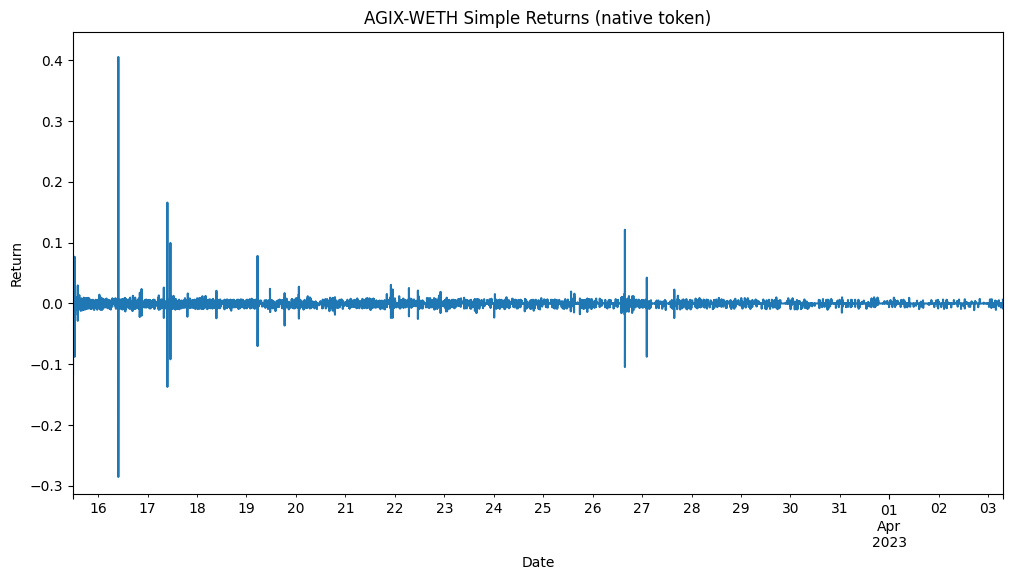

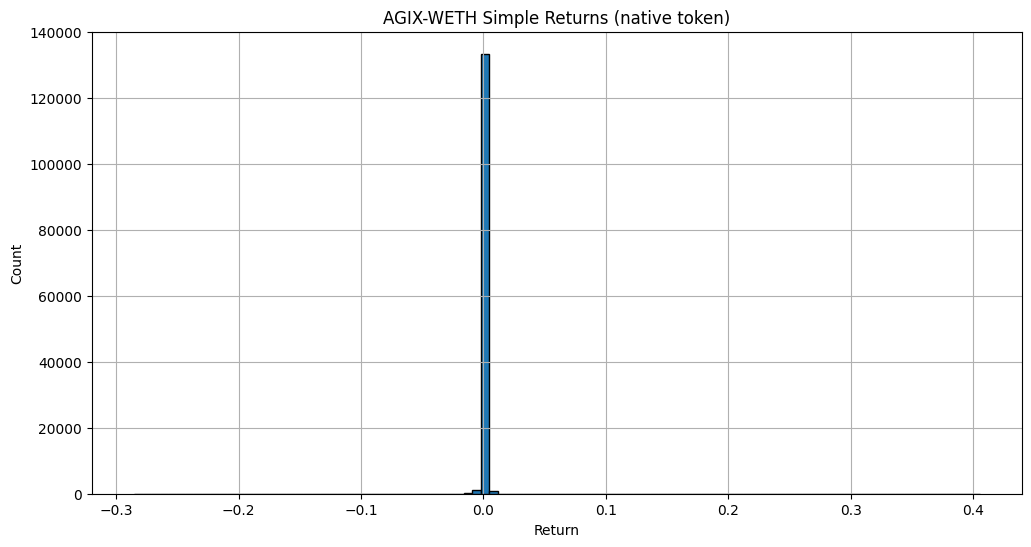

Simple Returns (native currency)
-0.28529839883551666
0.01   -0.001018
0.05    0.000000
0.25    0.000000
0.50    0.000000
0.75    0.000000
0.95    0.000000
0.99    0.002465
Name: return_native, dtype: float64
0.4053869757927038 

OPTIMUS-WETH


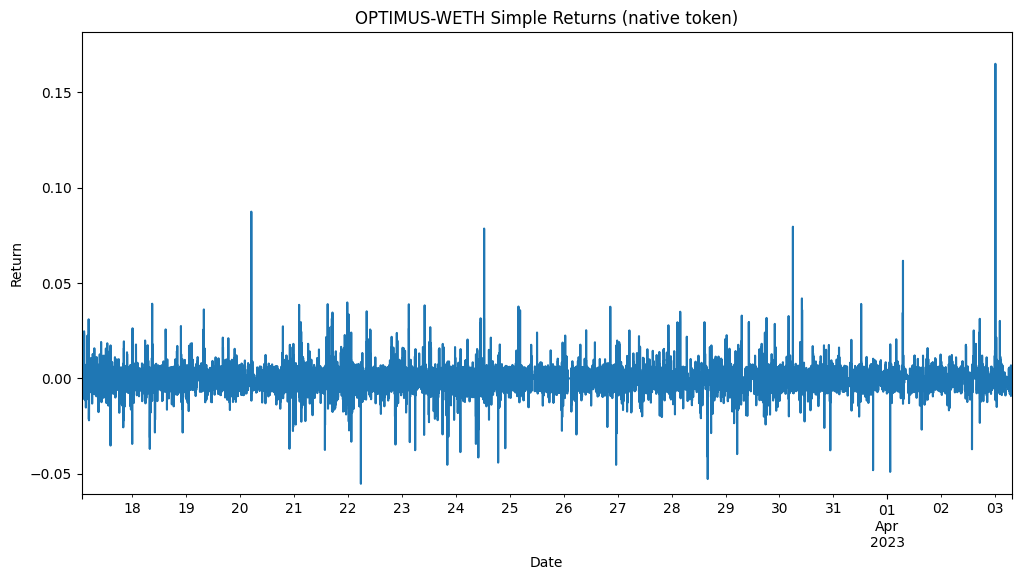

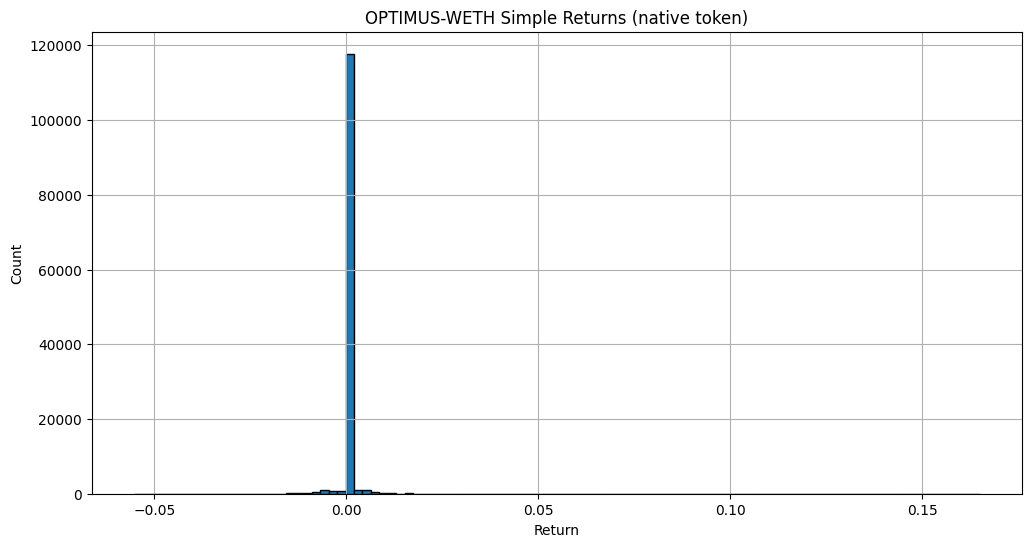

Simple Returns (native currency)
-0.05522335561027081
0.01   -0.006617
0.05    0.000000
0.25    0.000000
0.50    0.000000
0.75    0.000000
0.95    0.000000
0.99    0.005956
Name: return_native, dtype: float64
0.16490698843640006 

SHIK-WETH


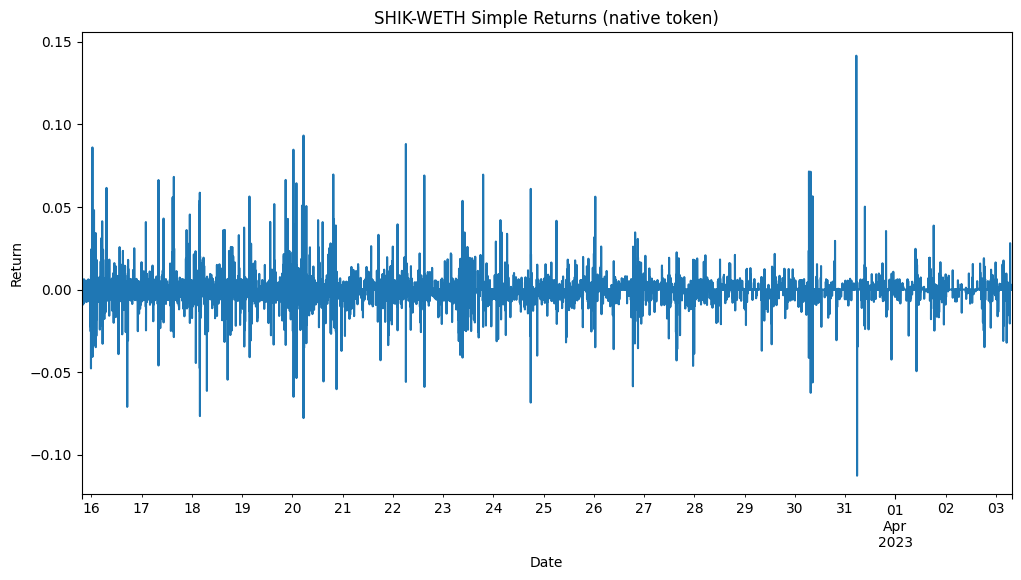

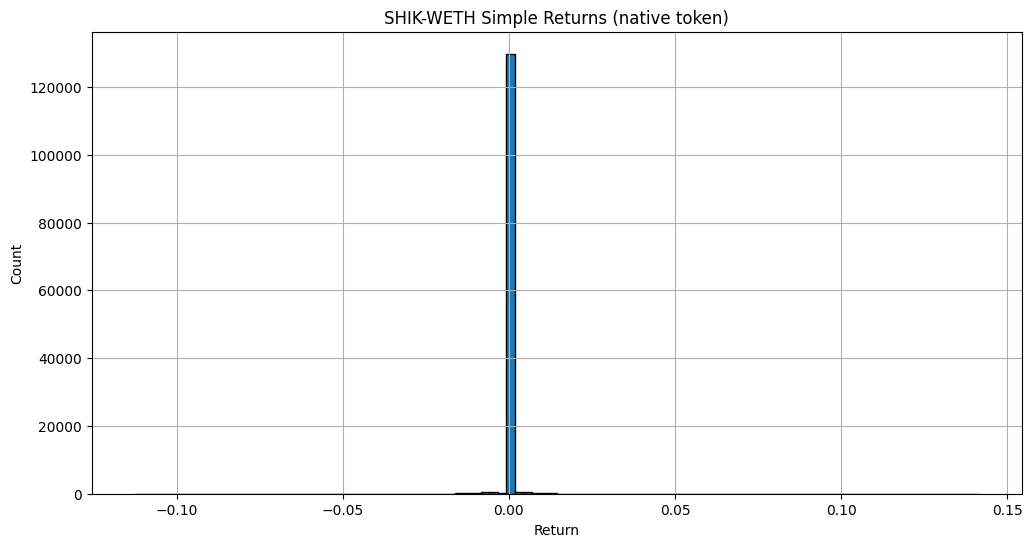

Simple Returns (native currency)
-0.11273584905660383
0.01   -0.003955
0.05    0.000000
0.25    0.000000
0.50    0.000000
0.75    0.000000
0.95    0.000000
0.99    0.003680
Name: return_native, dtype: float64
0.14162627894453417 

INJ-WBNB


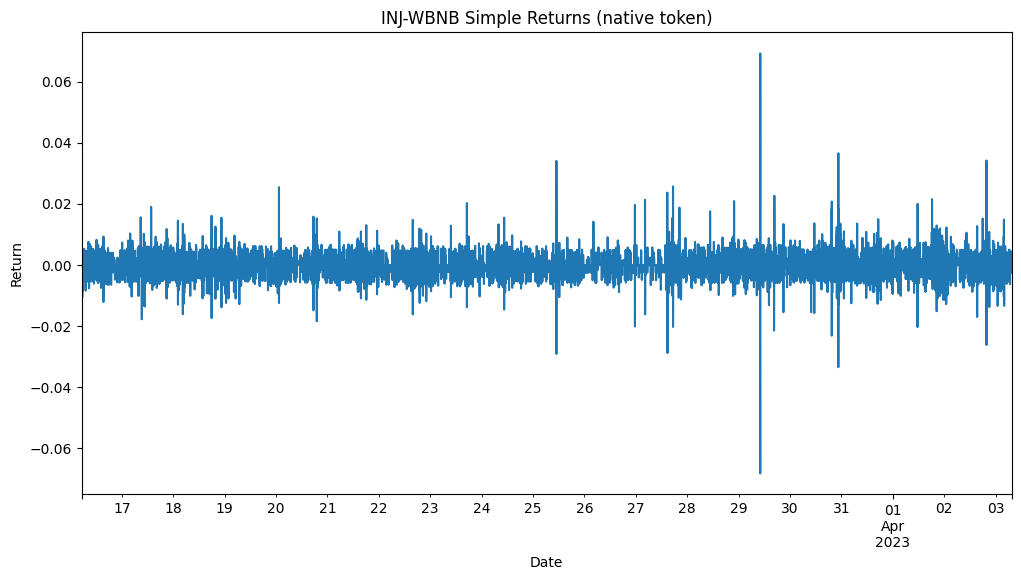

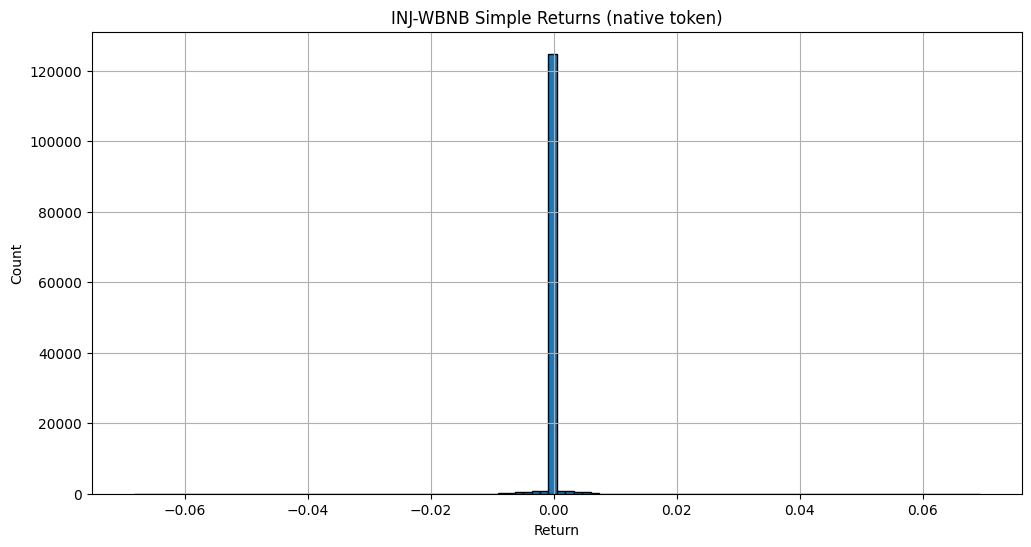

Simple Returns (native currency)
-0.06818181818181812
0.01   -0.003094
0.05    0.000000
0.25    0.000000
0.50    0.000000
0.75    0.000000
0.95    0.000000
0.99    0.003153
Name: return_native, dtype: float64
0.06923682140047194 

VOLT-WBNB


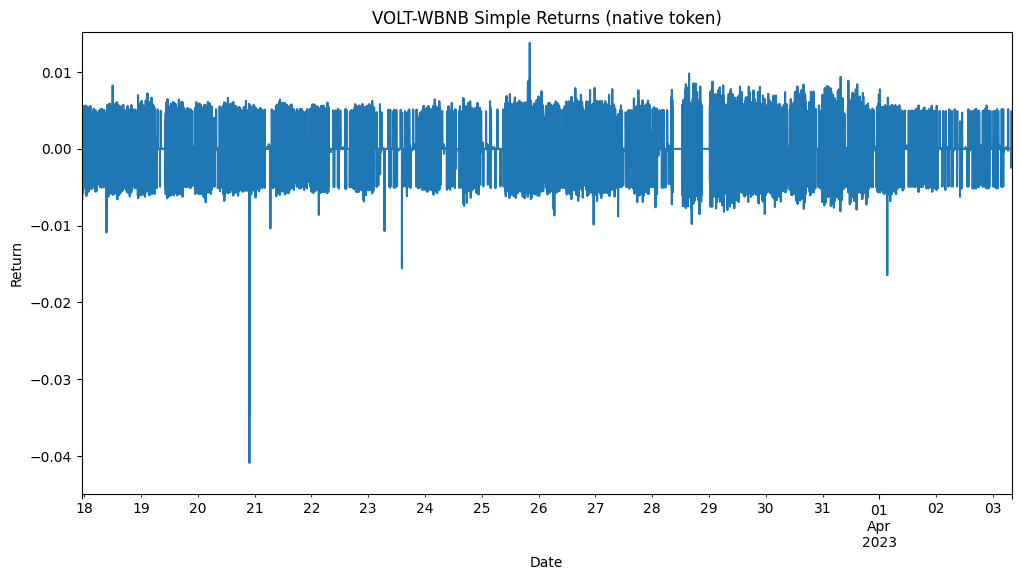

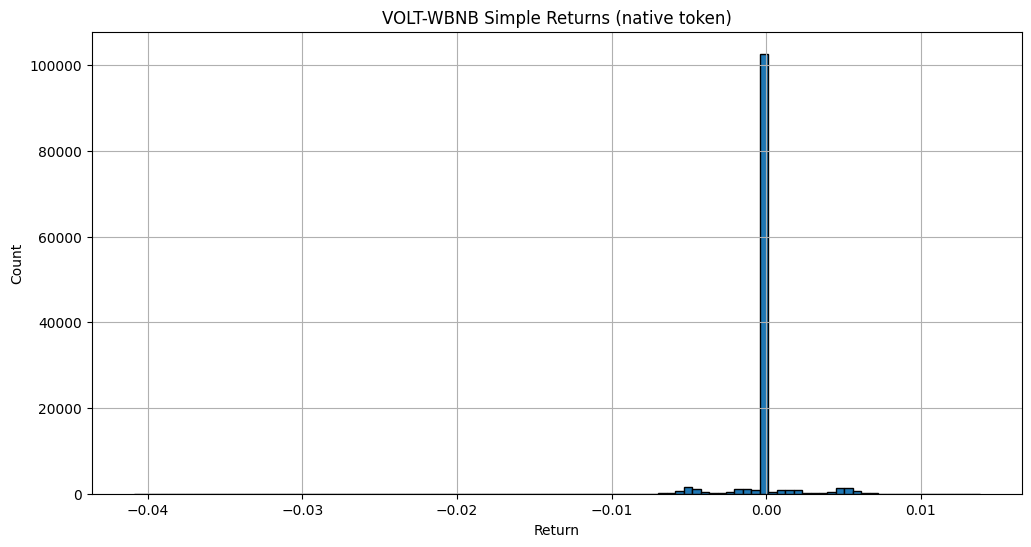

Simple Returns (native currency)
-0.040885860306643984
0.01   -0.005244
0.05   -0.001482
0.25    0.000000
0.50    0.000000
0.75    0.000000
0.95    0.001357
0.99    0.005376
Name: return_native, dtype: float64
0.013796076740676844 

MBOX-WBNB


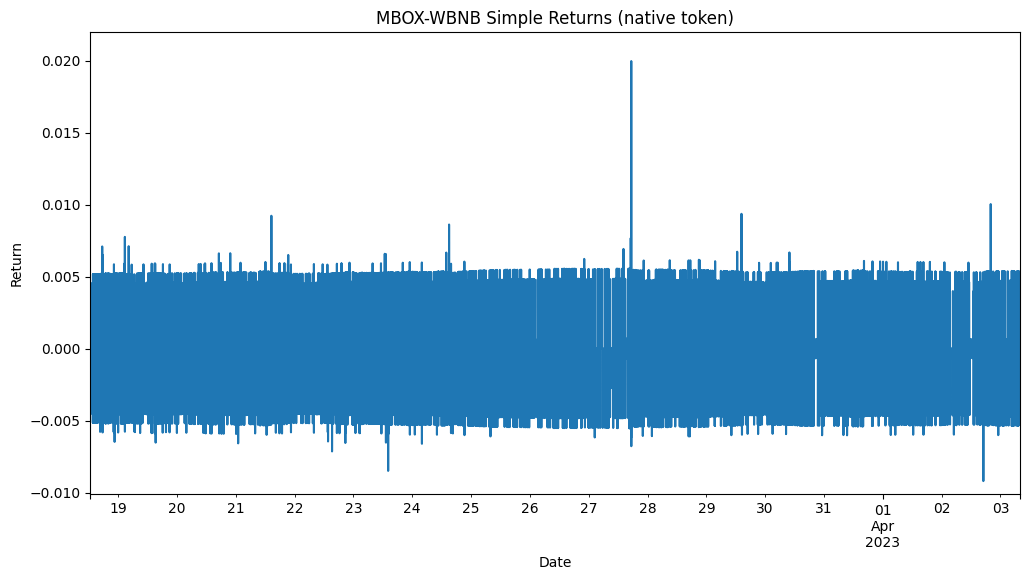

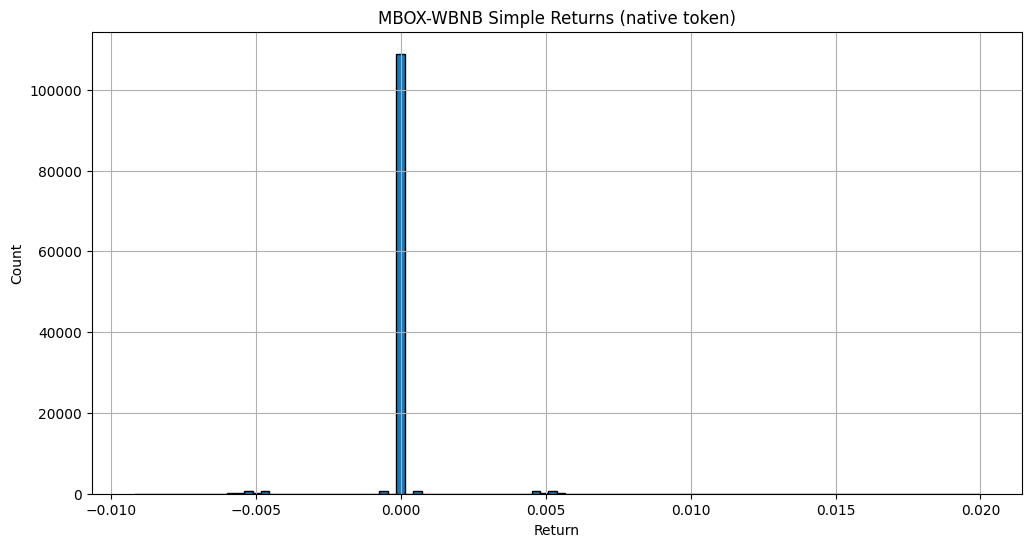

Simple Returns (native currency)
-0.009198423127463773
0.01   -0.004711
0.05    0.000000
0.25    0.000000
0.50    0.000000
0.75    0.000000
0.95    0.000000
0.99    0.004768
Name: return_native, dtype: float64
0.019972451790633672 

FLOKI-WBNB


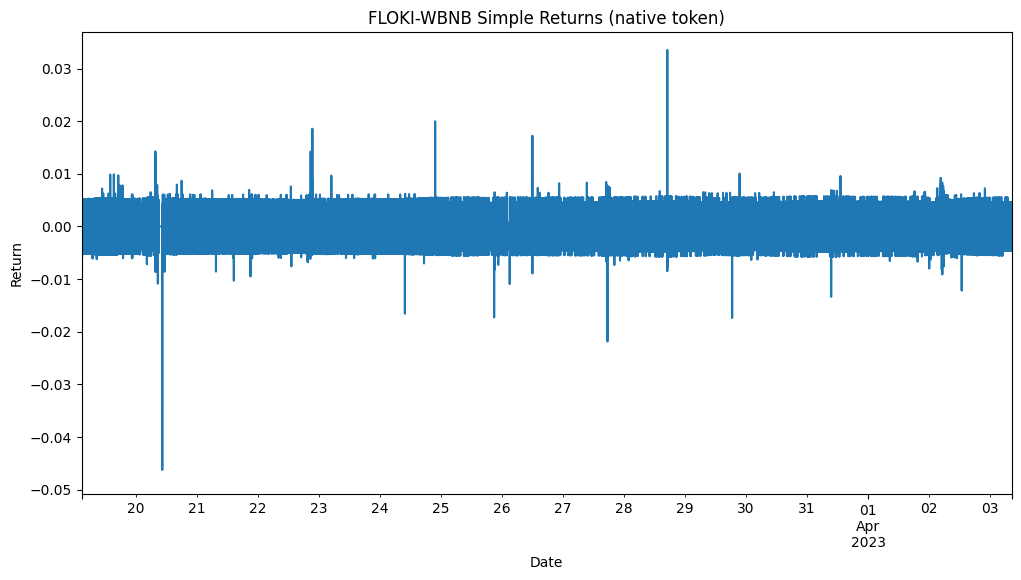

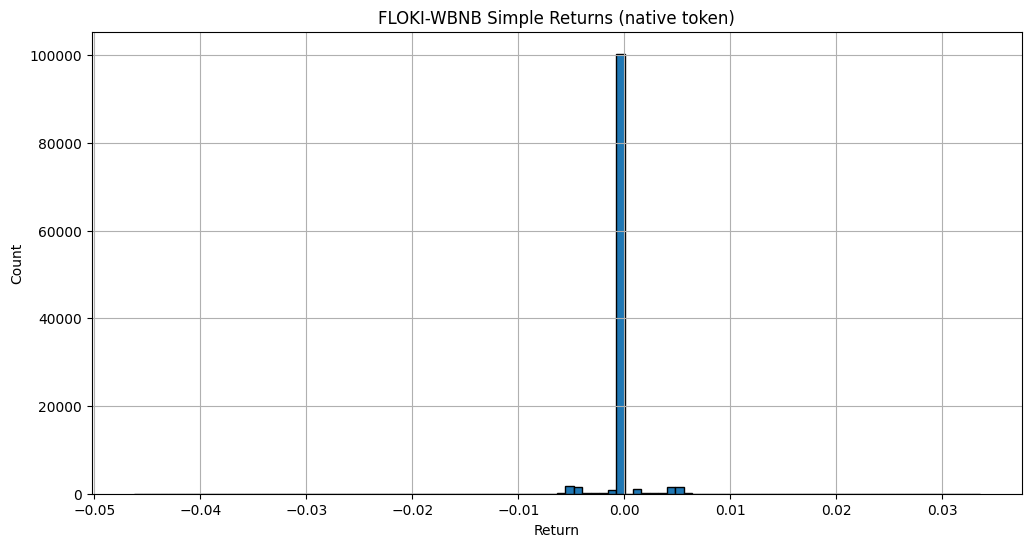

Simple Returns (native currency)
-0.046242774566474076
0.01   -0.005208
0.05    0.000000
0.25    0.000000
0.50    0.000000
0.75    0.000000
0.95    0.000000
0.99    0.005226
Name: return_native, dtype: float64
0.03352490421455934 

BabyDoge-WBNB


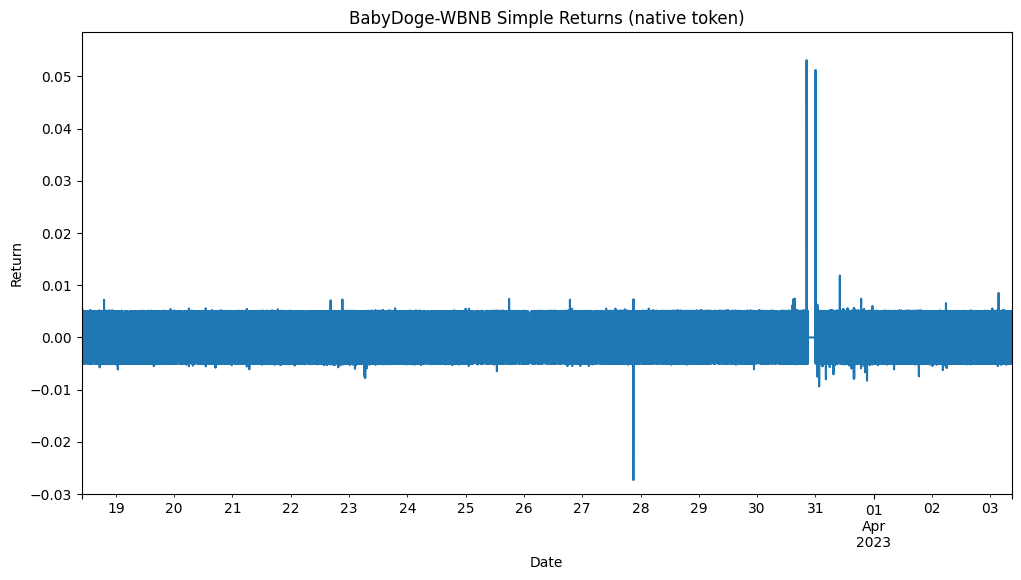

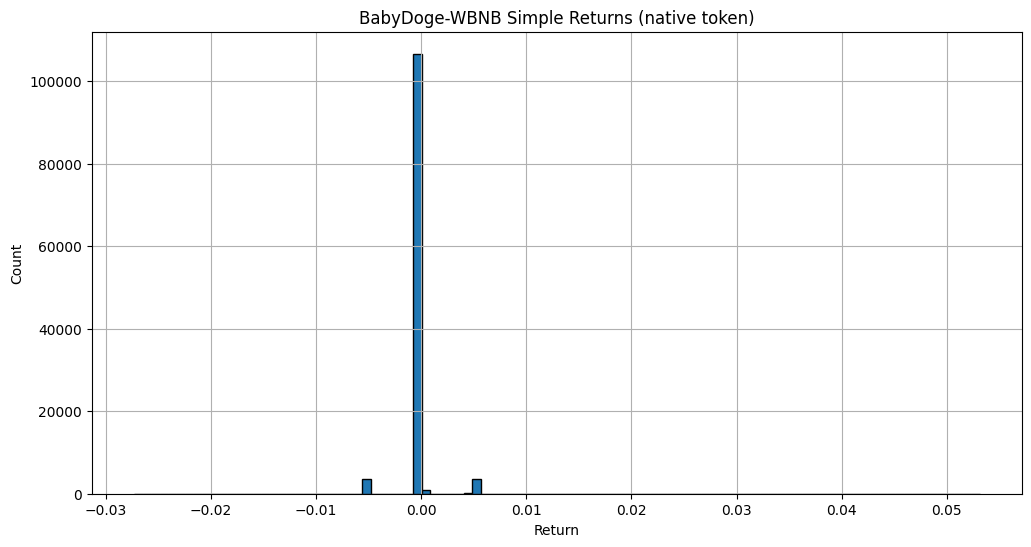

Simple Returns (native currency)
-0.027310032545634688
0.01   -0.005042
0.05    0.000000
0.25    0.000000
0.50    0.000000
0.75    0.000000
0.95    0.000000
0.99    0.005042
Name: return_native, dtype: float64
0.053118712273641844 



In [74]:
#loop through all 10 datasets
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    print(name)
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)

    df_rescaled = rescale_price_to_time_interval(df,time_interval = "12S", rescale_method='close')

    #print(df_rescaled.info())

    #Price plots
    #plot_price(df_rescaled, native=True, name=name, ax=None, plot_both=True)
  
    #adding retruns and plotting them
    add_returns(df_rescaled, price_col='price_native', ret_col='return_native', log_ret_col='log_return_native')
    add_returns(df_rescaled, price_col='price_USD', ret_col='return_USD', log_ret_col='log_return_USD')
    
    # #plot_returns(df, native=True, log=False, name=name, lower_percentile=0, higher_percentile=100, histogram=True, bins=100)
    plot_returns(df_rescaled, native=True, log=False, name=name, lower_percentile=0, higher_percentile=100, histogram=False, bins=100)
    plot_returns(df_rescaled, native=True, log=False, name=name, lower_percentile=0, higher_percentile=100, histogram=True, bins=100)
    print_stats(df_rescaled, native=True, log=False, name=name)



    ####################Test Statistics
    #print Jarque-Bera test -- H0: Skewness and Kurtosis match Normal distribution - strongly rejected
    # print(stats.jarque_bera(df_rescaled.return_native))

    # #print ADF (Augment Dickey-Fuller) -- H0: there is a unit root present (i.e. series is not stationary) - strongly rejected
    # result = adfuller(df_rescaled.return_native)
    # print('ADF Statistic: %f' % result[0], 'p-value: %f' % result[1])


    ##############ACF and PACF
    #plot_acf_pacf(df_rescaled.return_native, lags=35, figsize=(9, 8))

### Ideas

#### 4/10/23

What I see as a problems right now:

- I have unevenly spaced trade data.

- Returns I see are sometimes as expected, sometimes there is the buy-sell (spread) gap.

Solutions:

- spacing: Transform data to unified time intervals. Either 5 minutes, or play along with the blockchain timing and set interval 12 sec on ETH and 3 on BSC -- verify with the histogram of time interval lenghts. The reason is that my focus is now just describe how returns behave, not some fancy durations stuf. This Would give me a solid base how the returns could be described and I could continue to the *simulation*

- Spread gap: Either transform data somehow, or leave as "feature", not a bug", and attempt to simulate it in the Agent model

ToDo next:

- ~~Plot the histogram of observation spacings~~ -- done, they are mostly close to sub 1 minute (majority between 0 and 50 seconds). It seems that it might be reasonable to set the rescale time interval according to blocks, in ETH a lot of trades is spaced between 8 and 15 seconds, while in BSC it is sub 8 (rough estinates, just based on histogram observations). This aligns with the blocktimes.

- Try rescaling data with 12 and 3 second intervals -- tried 12s and it seems like too much, at least for histograms. The plots of prices and returns in time look very similar, in histogram any other values than 0 have almost no bars.

- ~~get the Jarque berra test and ADF test for 5Min transformation, just to verify that it is sound~~ -- it is, super significantly both rejected

- ~~Plot ACF and PACF ((partial)autocorrelation function) - read the kaggle post + define it as a function~~ -- done
